# Visualization Notebook
This notebook helps to visualization the data logged during the runs. The data is published in the corresponding skill and published to a topic. The logger node is listeining and writes the data to a pickle file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Dataloader
The following function can be used to load data from your last recent run to a pandas dataframe for later use. The ROS framework dumps the log data every 10000 steps to a pickle file. With a frequency of 1000 Hz this corresponds to around 10 seconds. With the number of pickle files loaded into the dataframe, one can choose the timespan of interest. The data dumps are numbered in consecutive order. By changing the start number one can choose the starting time in 10 second steps.

In [5]:
def load_data_from_pickles(directory_path='./log_data/pd/year-month-day_hour-min/', num_of_pickles=1, start_num=0):
    """
    Loads a specified number of datafiles into a pandas dataframe
    """
    assert num_of_pickles > 0
    path = directory_path + 'data' + str(start_num) + '.pickle'
    data = pd.read_pickle(path)
    df = pd.DataFrame(data)
    for _, i in enumerate(range(start_num+1,start_num + num_of_pickles)):
        path = directory_path + 'data' + str(i) + '.pickle'
        data = pd.read_pickle(path)
        df_temp = pd.DataFrame(data)
        df = pd.concat([df, df_temp], ignore_index=True)
    return df

## 1. PD Controller

First list all directories with logging data. Then copy the run you like to investigate as a directory_path to the dataloader.

In [9]:
os.listdir('./log_data/pd/')

['2020-12-22_12-14', '2020-12-22_12-15']

The following cell reads the data from the pickle file and safes it to a pandas dataframe. Change the file to investigate the behaviour of different timesteps

In [ ]:
df = load_data_from_pickles(directory_path='./log_data/pd/2020-11-26_15-05/', num_of_pickles=3, start_num=0)
list(df.columns)

In [ ]:
q = df['q'].apply(pd.Series)
q_d = df['q_d'].apply(pd.Series)
dq = df['dq'].apply(pd.Series)
err_q = df['error_q'].apply(pd.Series)
t = df['timestamp'].apply(pd.Series)

In [ ]:
q.insert(0,'time',t)
q_d.insert(0,'time',t)
dq.insert(0,'time',t)
err_q.insert(0,'time',t)

In [ ]:
f, axes = plt.subplots(4,1,figsize=(25,20))
f.tight_layout(h_pad=6)
q.plot(x="time", y=[0,1,2,3,4,5,6], ax=axes[0])
axes[0].set(title='Joint position q[rad] over time t[sec]', ylabel='q_i', xlabel='time t[sec]')
q_d.plot(x="time", y=[0,1,2,3,4,5,6], ax=axes[1])
axes[1].set(title='Desired joint position q_d[rad] over time t[sec]', ylabel='q_d_i', xlabel='time t[sec]')
err_q.plot(x="time", y=[0,1,2,3,4,5,6], ax=axes[2])
axes[2].set(title='Control error of joint positions over time t[sec]', ylabel='err_q_i', xlabel='time t[sec]')
dq.plot(x="time", y=[0,1,2,3,4,5,6], ax=axes[3])
axes[3].set(title='Joint velocity dq[rad] over time t[sec]', ylabel='dq_i', xlabel='time t[sec]')

In [ ]:
f2, axis = plt.subplots(1,1,figsize=(15,10))
err_q.plot(y=[0,1,2,3,4,5,6],kind='box', ax=axis)
axis.set(title='Error', ylabel='error', xlabel='joint number i')

## 2. Impedance Controller

In [10]:
os.listdir('./log_data/cart/')

['2020-12-22_12-14', '2020-12-22_12-15']

In [12]:
df = load_data_from_pickles(directory_path='./log_data/cart/2020-12-22_12-15/', num_of_pickles=1, start_num=0)
list(df.columns)

['timestamp', 'pos', 'pos_d', 'error_x', 'tau_prim', 'tau_sec']

In [14]:
pos = df['pos'].apply(pd.Series)
pos_d = df['pos_d'].apply(pd.Series)
err = df['error_x'].apply(pd.Series)
tau_prim = df['tau_prim'].apply(pd.Series)
tau_sec = df['tau_sec'].apply(pd.Series)
t = df['timestamp'].apply(pd.Series)

In [15]:
pos.insert(0,'time',t)
pos_d.insert(0,'time',t)
err.insert(0,'time',t)
tau_prim.insert(0,'time',t)
tau_sec.insert(0,'time',t)

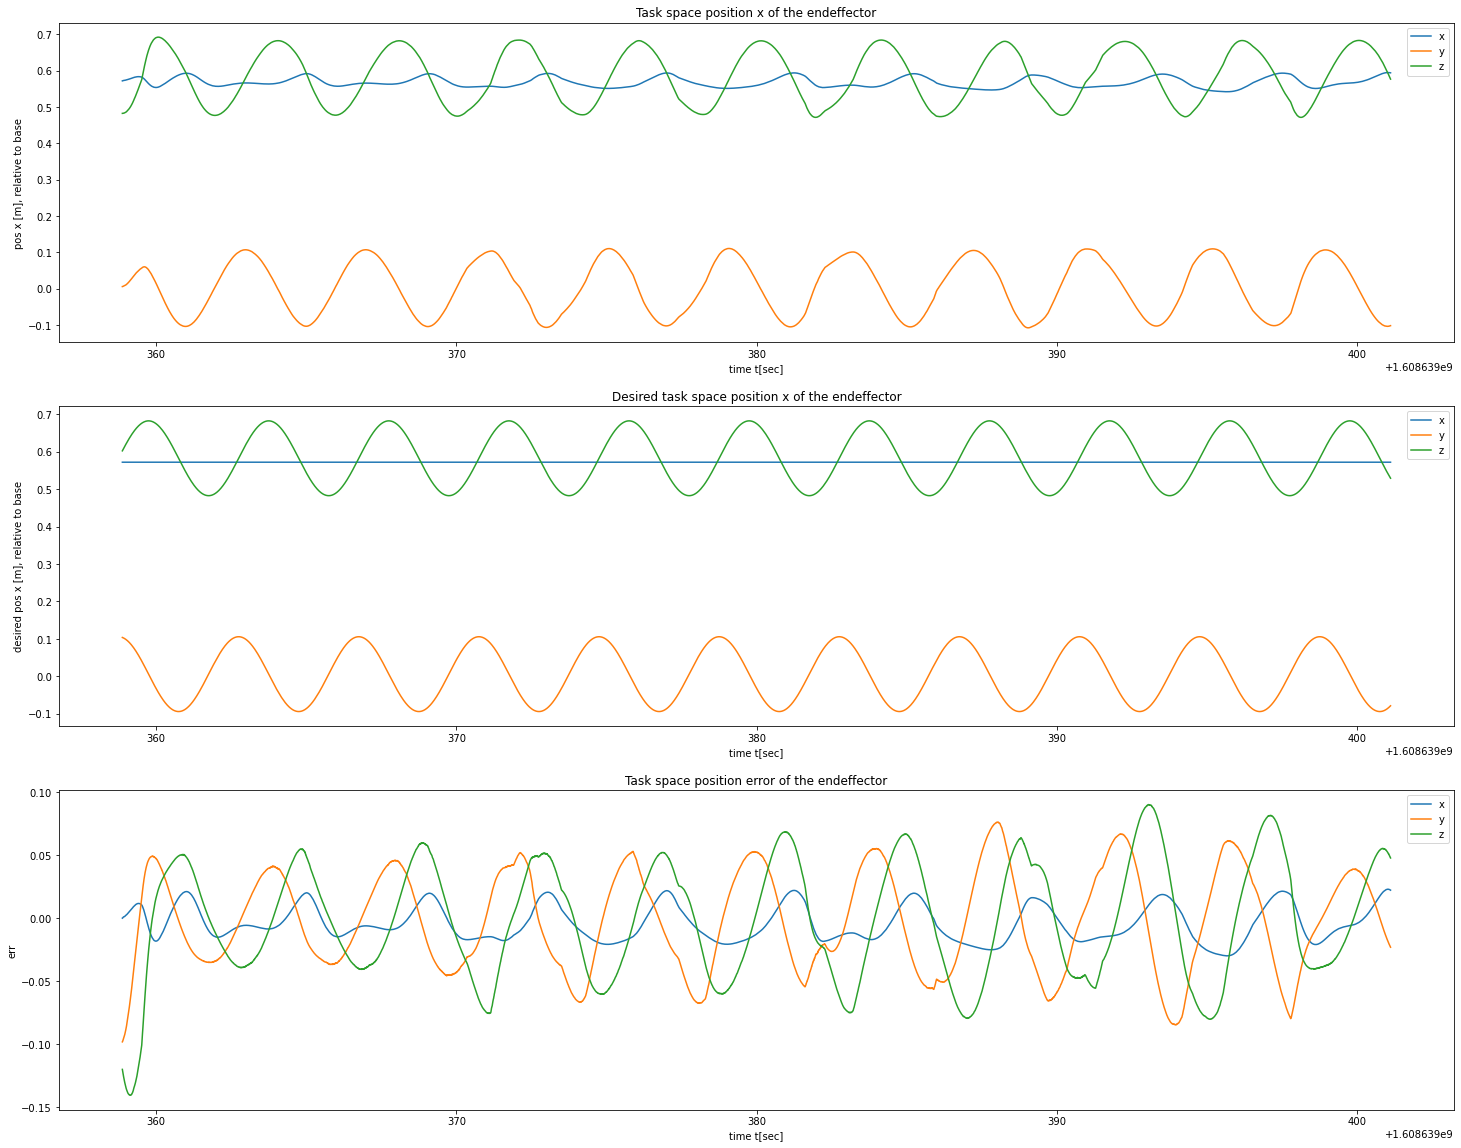

In [16]:
f, axes = plt.subplots(3,1,figsize=(25,20))
pos.plot(x="time", y=[0,1,2], ax=axes[0])
axes[0].set(title='Task space linear position of the endeffector', 
            ylabel='x_lin [m]',
            xlabel='time t[sec]')
#axes[0].legend(loc="upper left")
axes[0].legend(['x','y','z'], loc="upper right")

pos_d.plot(x="time", y=[0,1,2], ax=axes[1])
axes[1].set(title='Desired task space linear position of the endeffector', ylabel='x_lin_d [m]', xlabel='time t[sec]')
axes[1].legend(['x','y','z'], loc="upper right")

err.plot(x="time", y=[0,1,2], ax=axes[2])
axes[2].set(title='Task space linear position error of the endeffector', ylabel='x_lin_e', xlabel='time t[sec]')
axes[2].legend(['x','y','z'], loc="upper right")

<AxesSubplot:xlabel='time'>

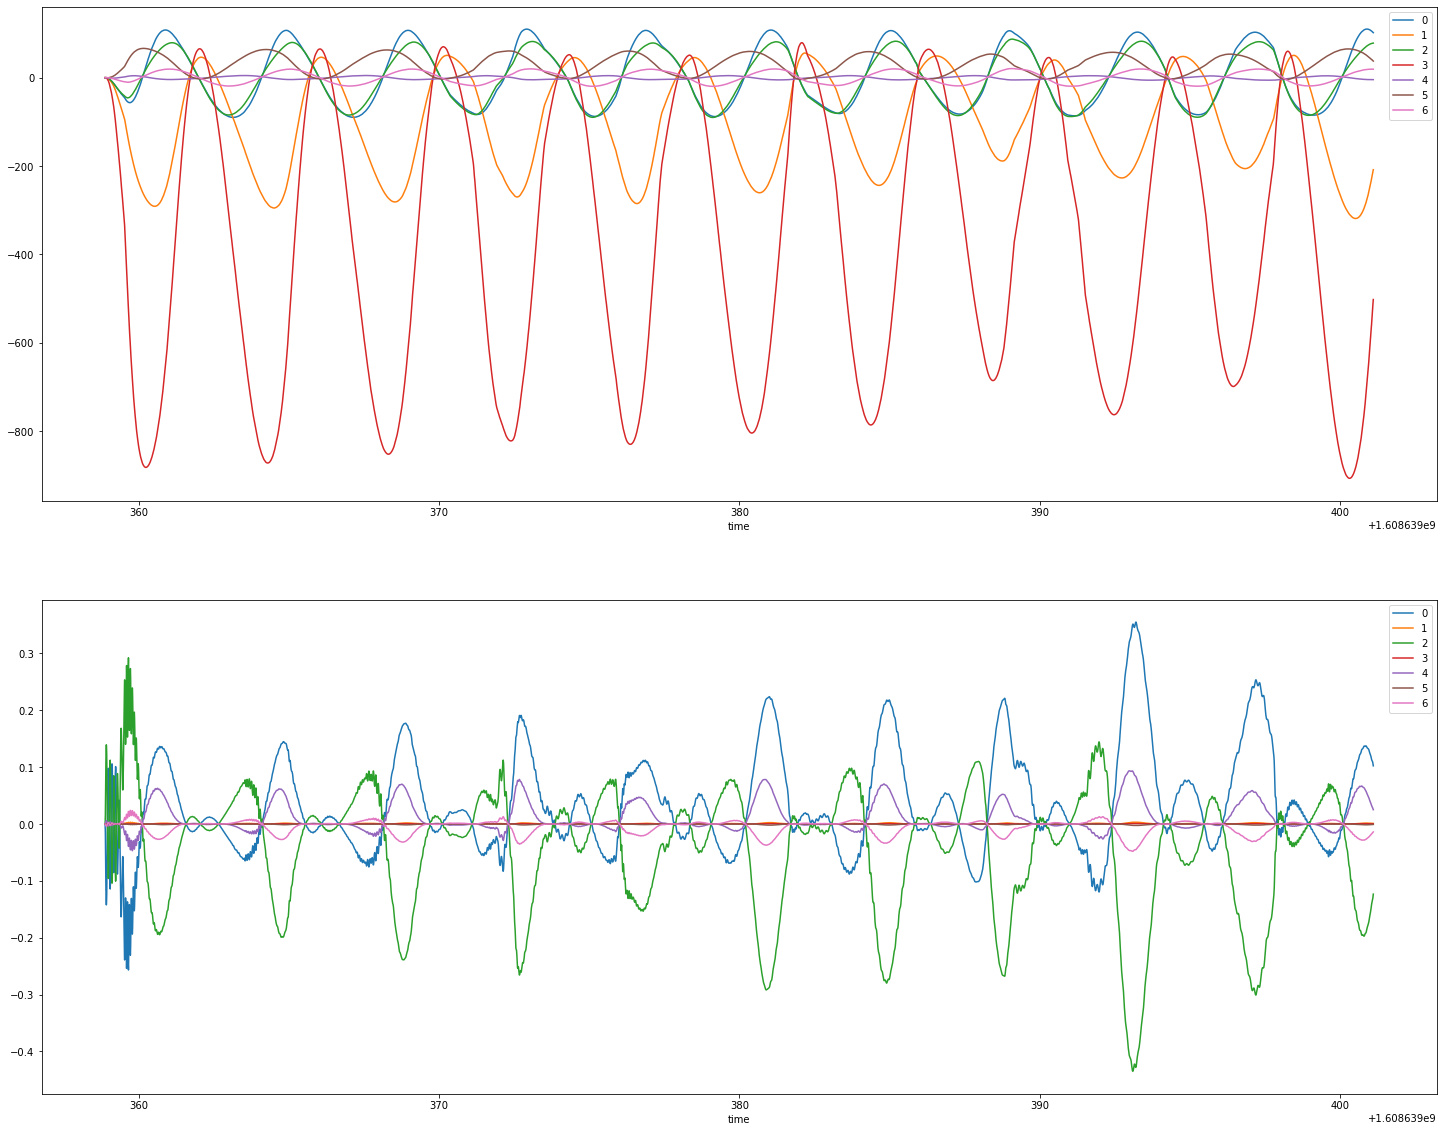

In [17]:
f, axes = plt.subplots(2,1,figsize=(25,20))
tau_prim.plot(x="time", y=[0,1,2,3,4,5,6], ax=axes[0])
tau_sec.plot(x="time", y=[0,1,2,3,4,5,6], ax=axes[1])